In [17]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

import os
import IPython.display

In [84]:
wav = '112.wav'
file_id, file_format = wav.split('.')
file_sr = librosa.get_samplerate(wav)

y, sr = librosa.load(wav, sr=file_sr)
print('sr: ', sr)
print('wav shape: ', y.shape)
print('length: ', y.shape[0]/float(sr), 'secs')
IPython.display.Audio(data=y, rate=sr)

sr:  44100
wav shape:  (1100800,)
length:  24.961451247165535 secs


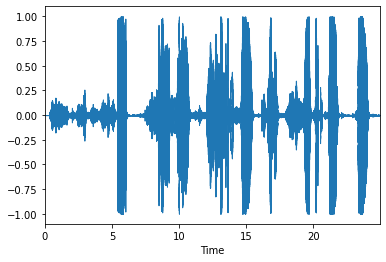

In [85]:
librosa.display.waveplot(y, sr=sr)

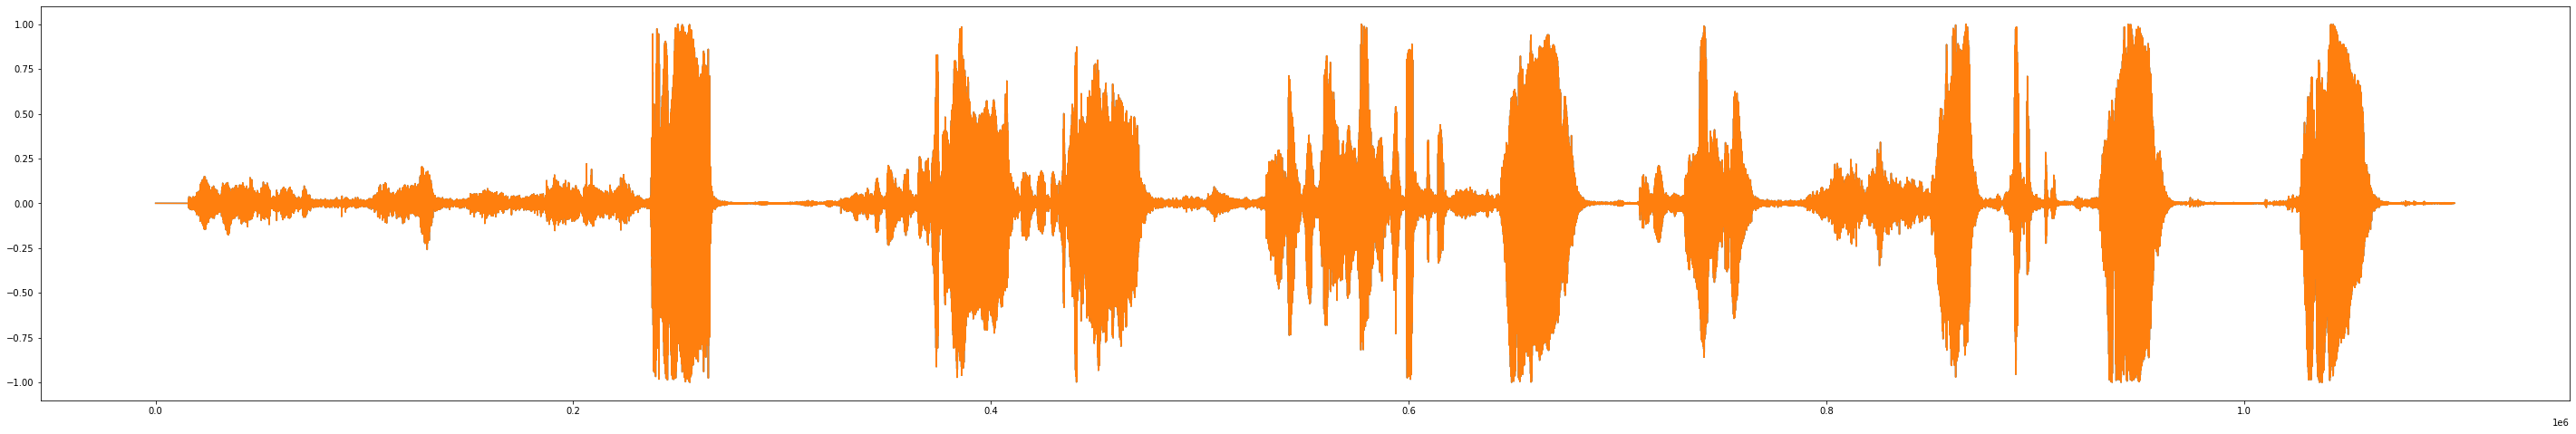

In [86]:
fig = plt.figure(figsize=(50, 8)) 
print(plt.plot(y))
print(plt.plot(y[0:len(y)]))
plt.savefig(file_id+'_shape.png')

In [90]:
start = []
end = []
first = True
con = 0

for time in range (len(y)):
    if(abs(y[time]) > 0.25):
        if(first):
            first = False
            start_time = time
        else:
            end_time = time
    else:
        con = con + 1
        if(con > 20000):
            con = 0
            if(not first) :
                start.append(start_time)
                end.append(end_time)
                first = True
print(len(start))
print(len(end))

23
23


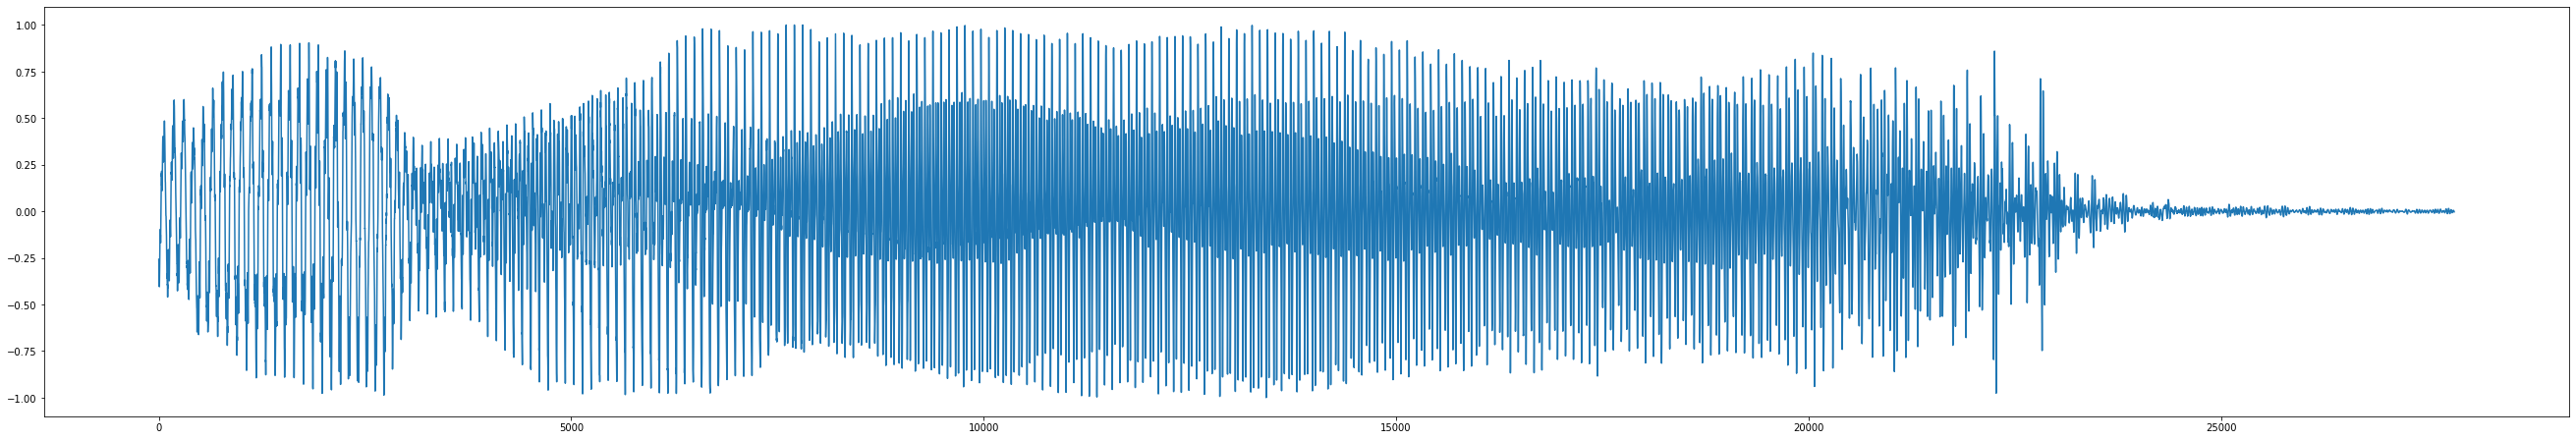

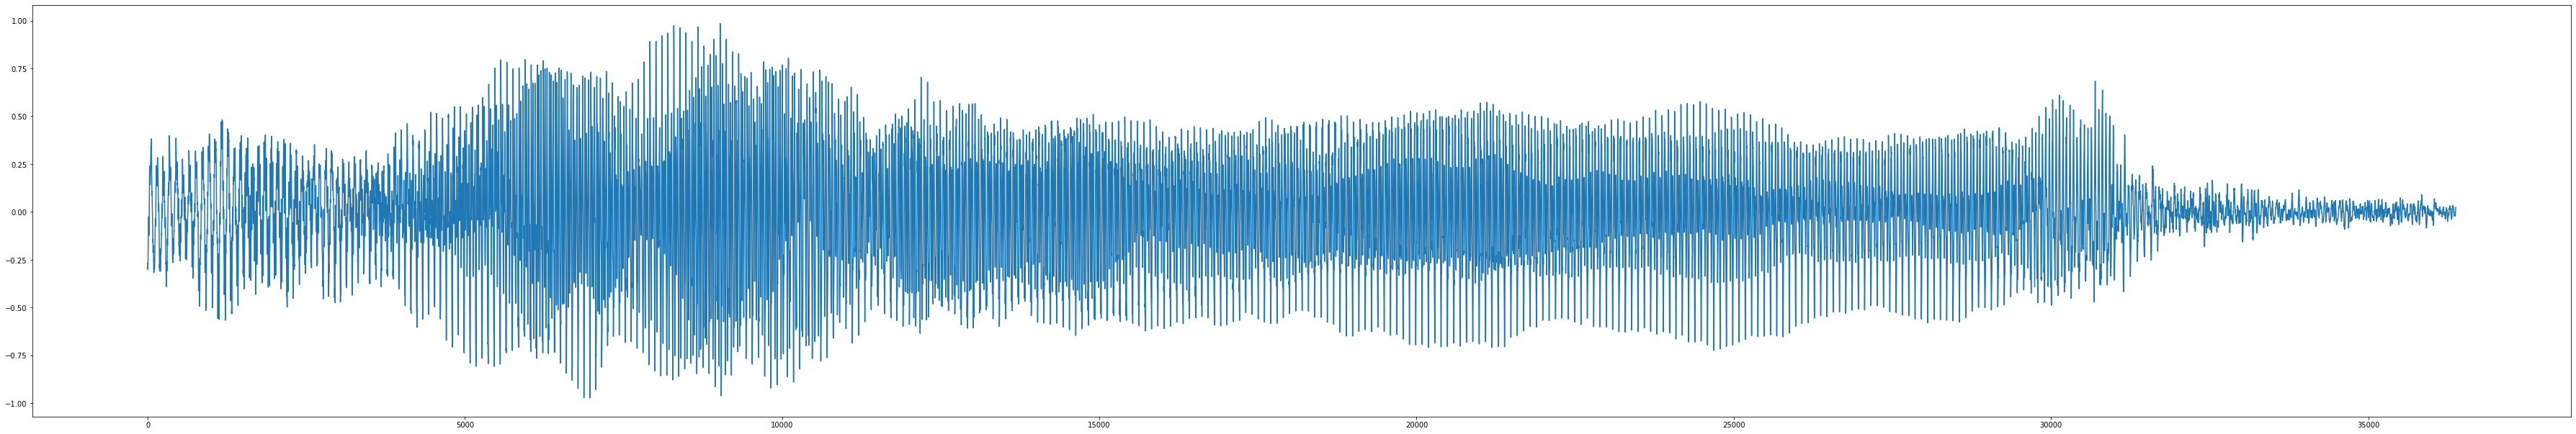

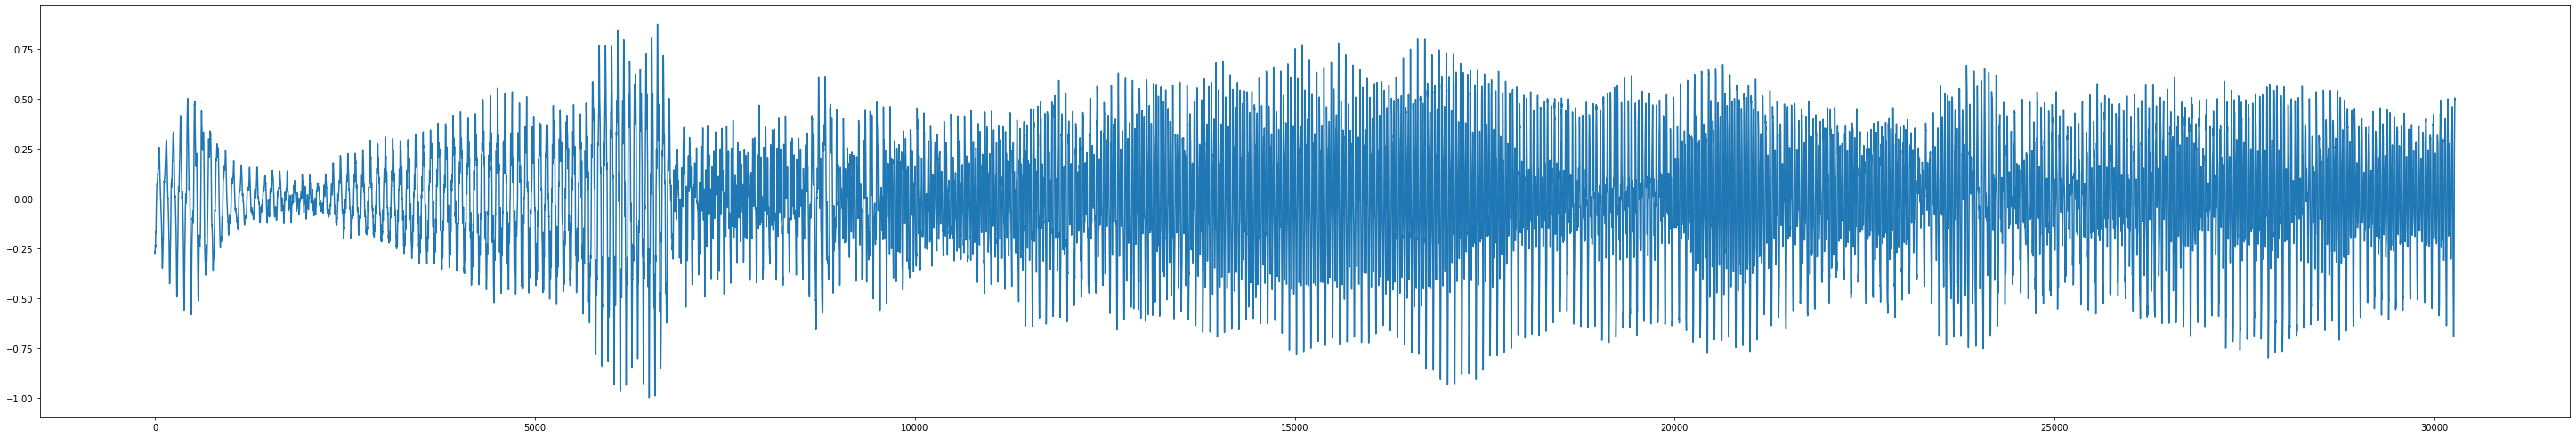

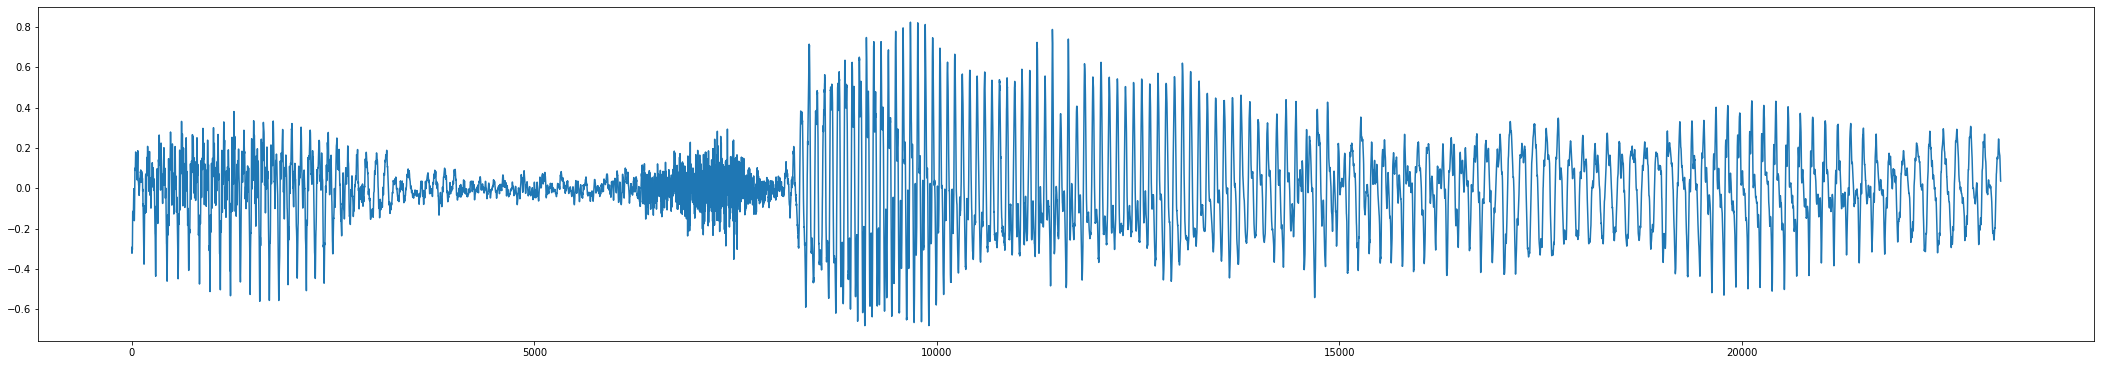

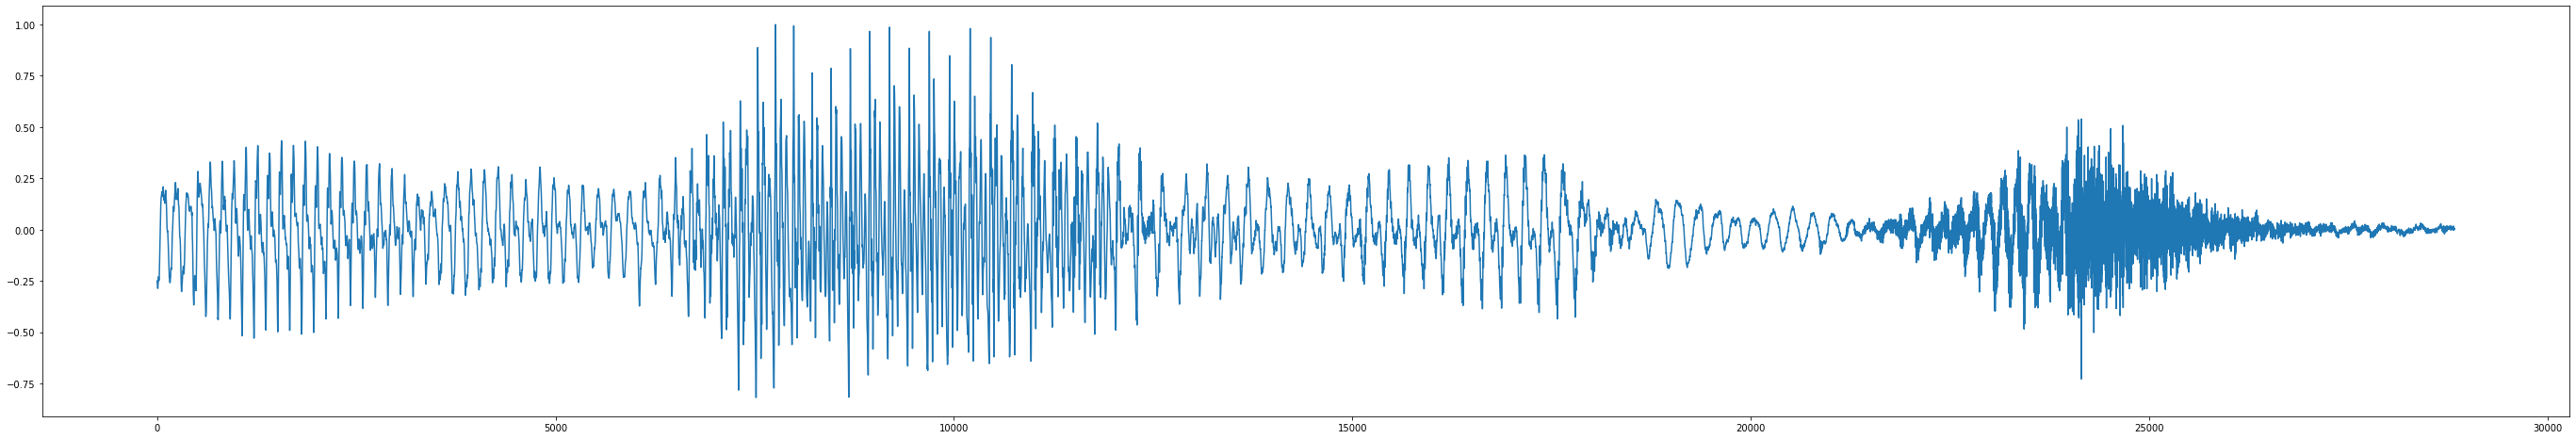

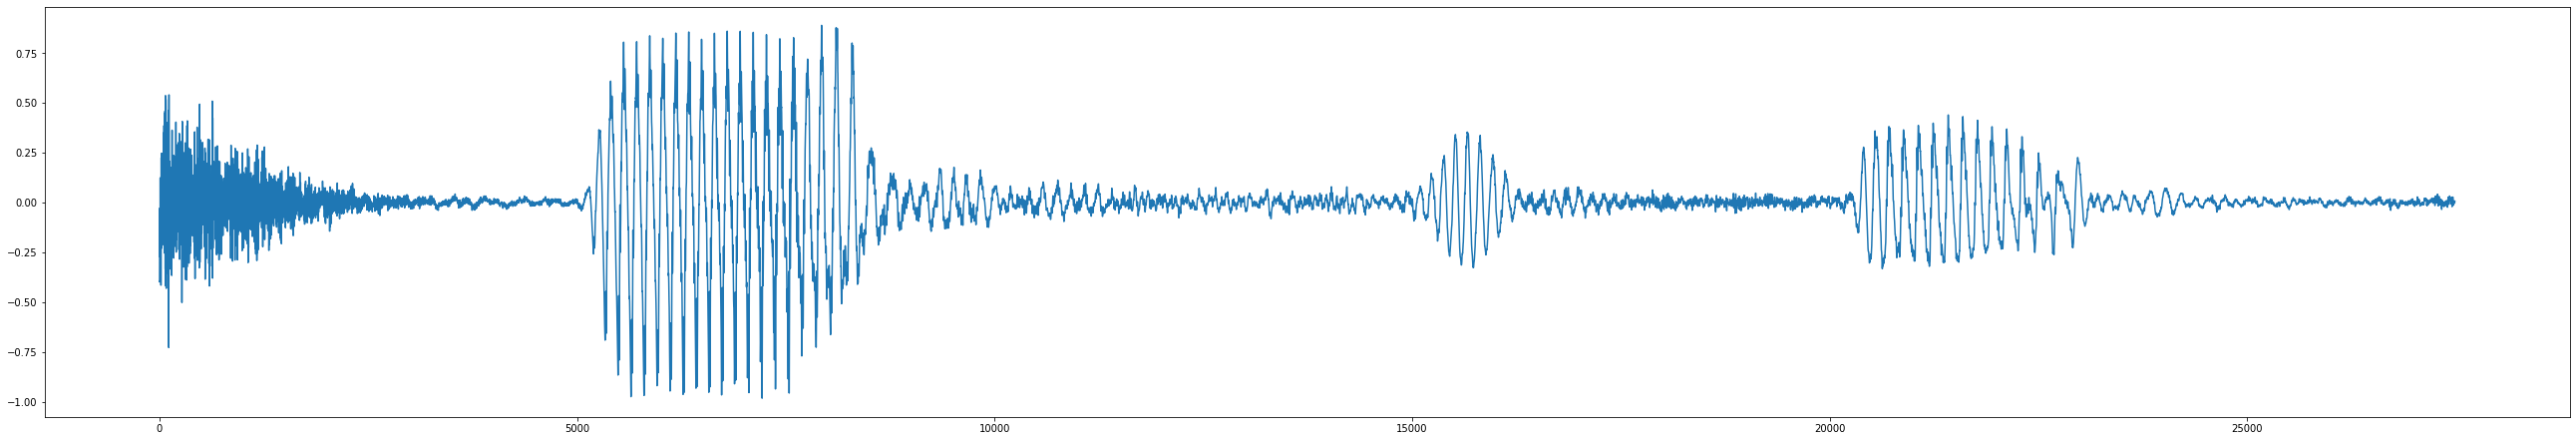

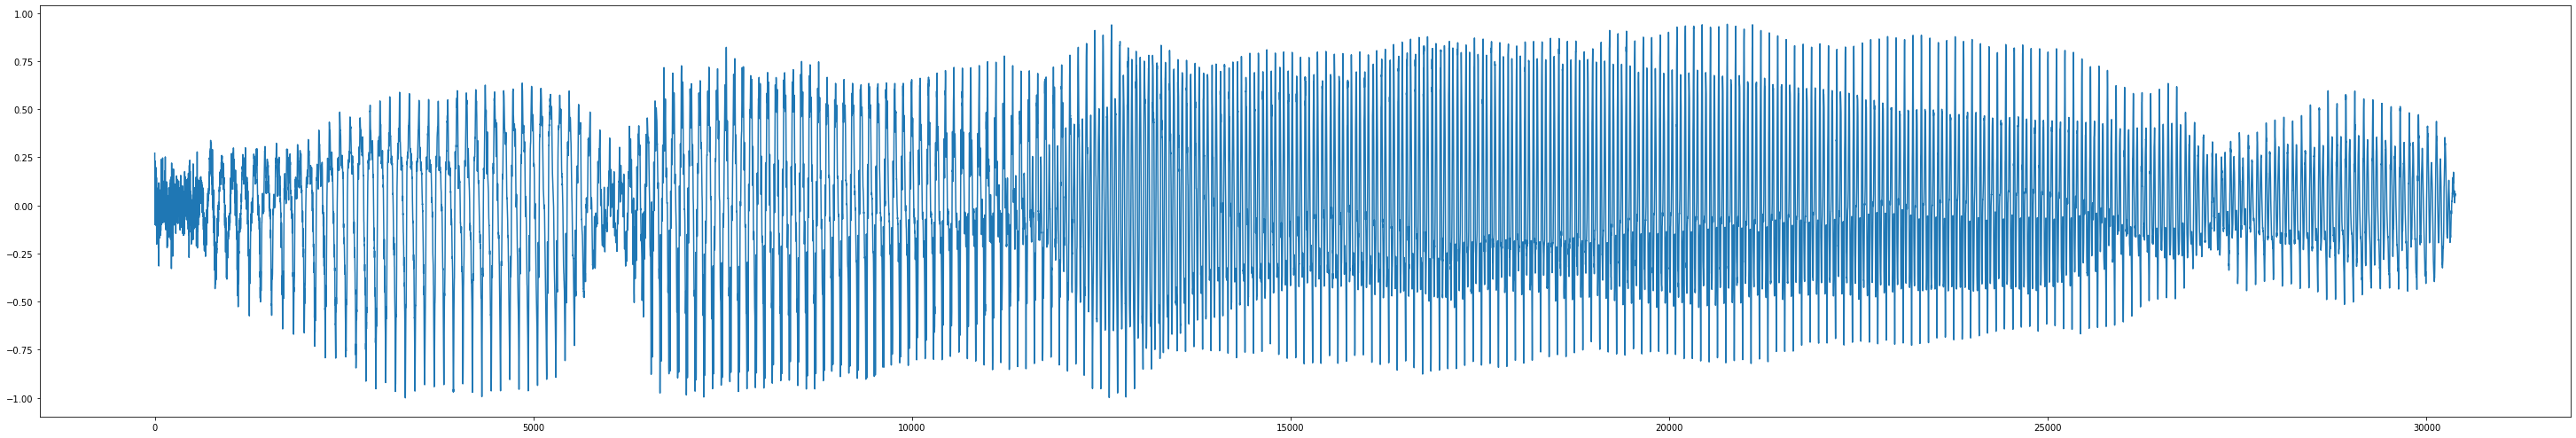

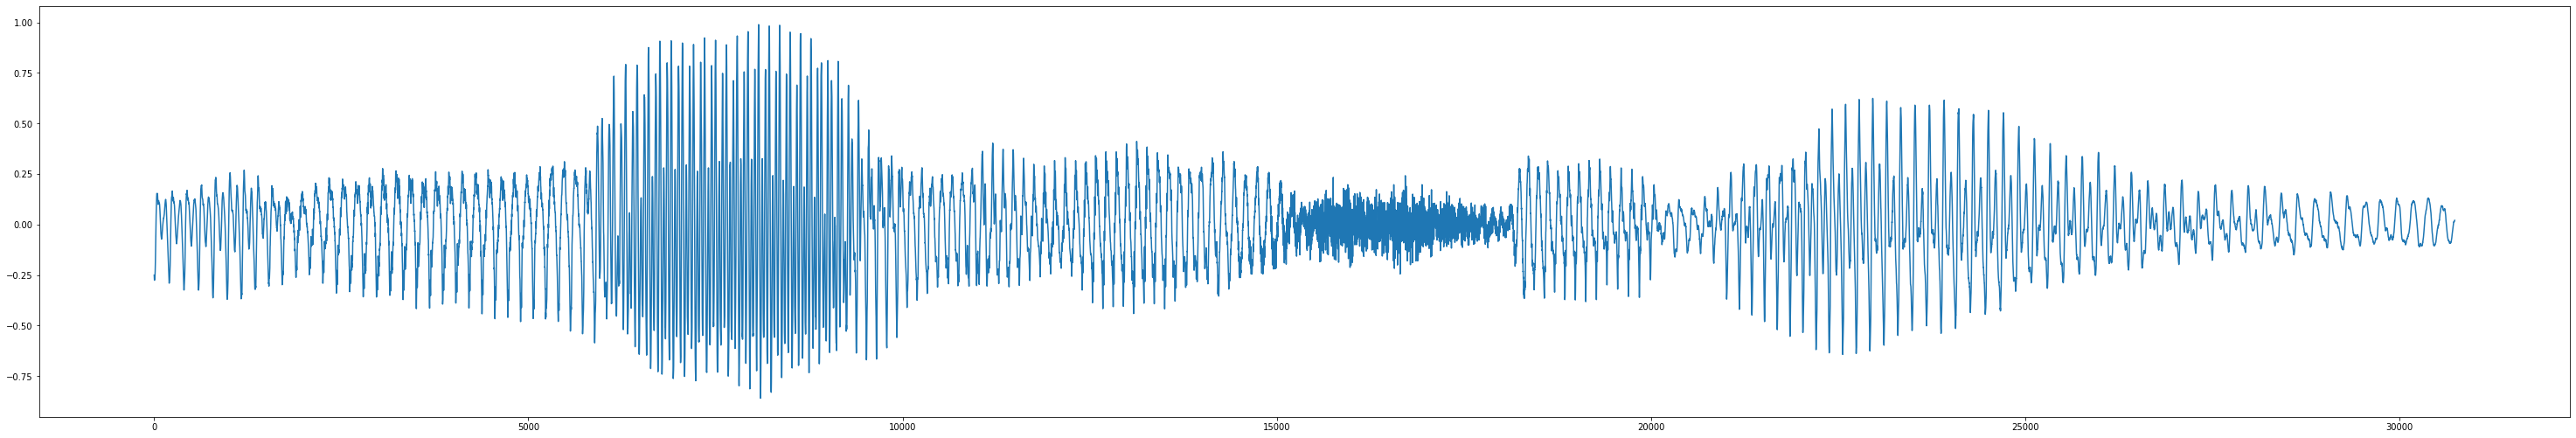

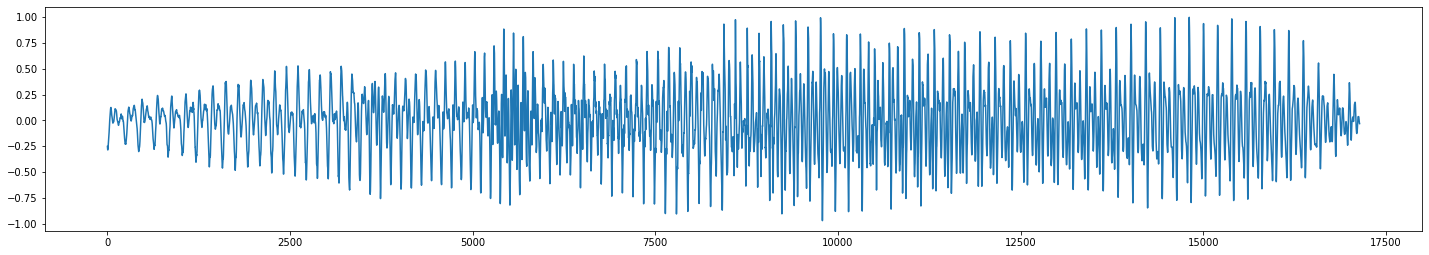

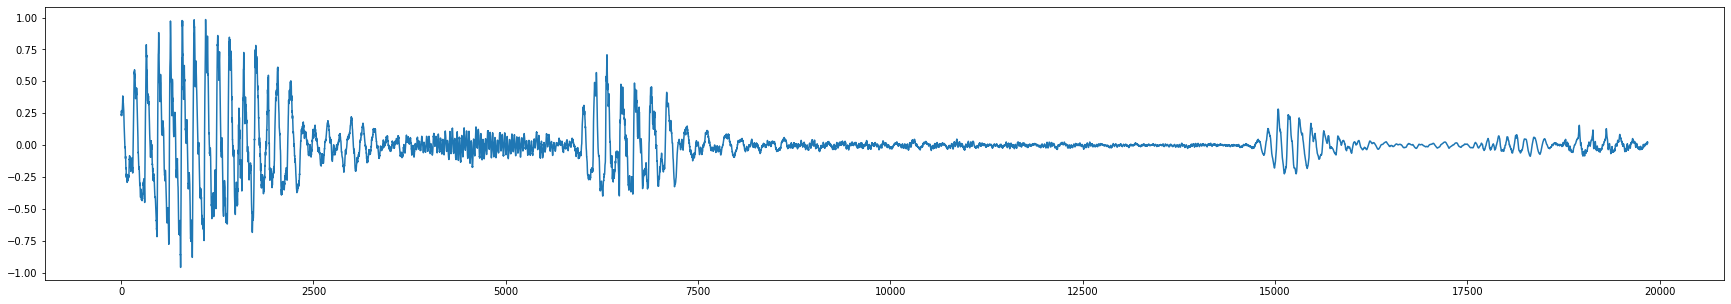

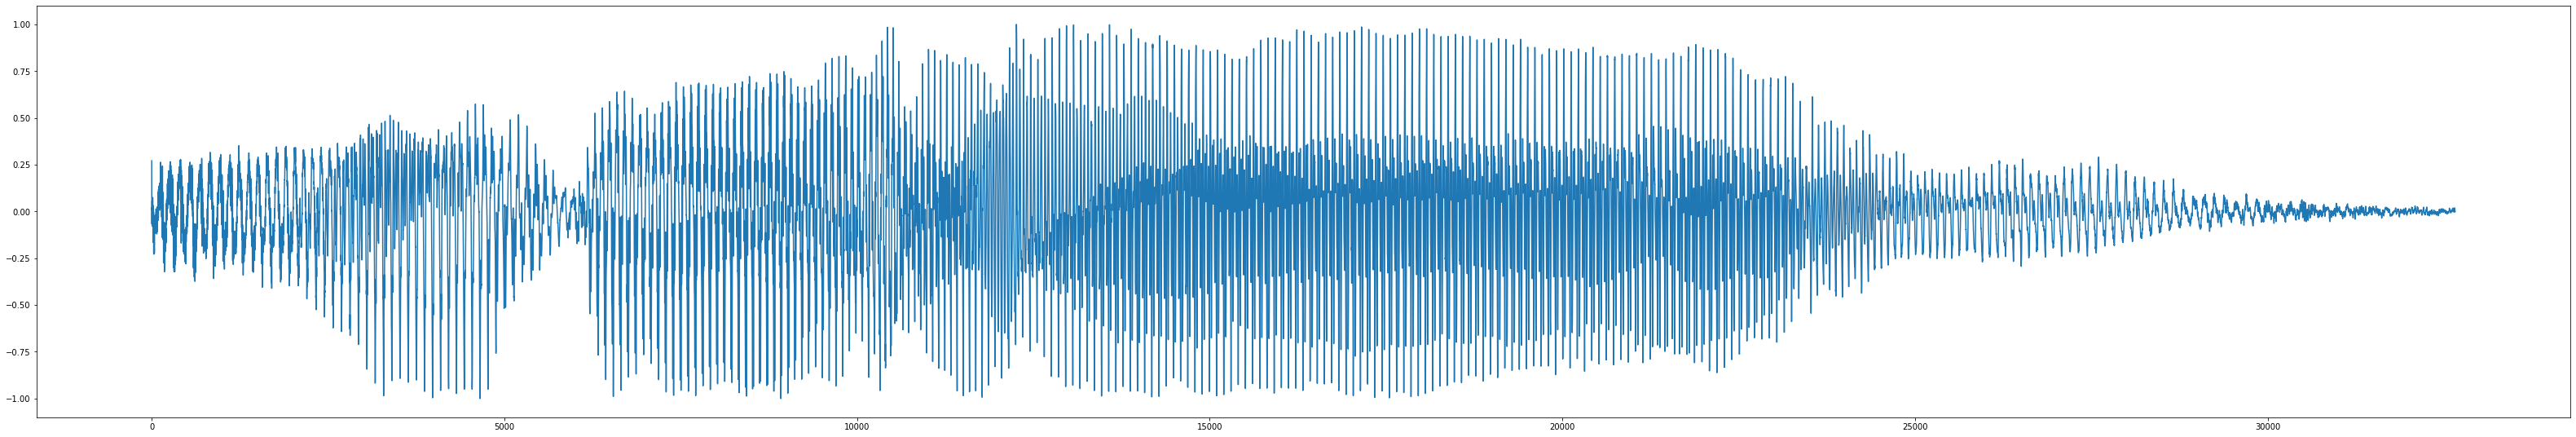

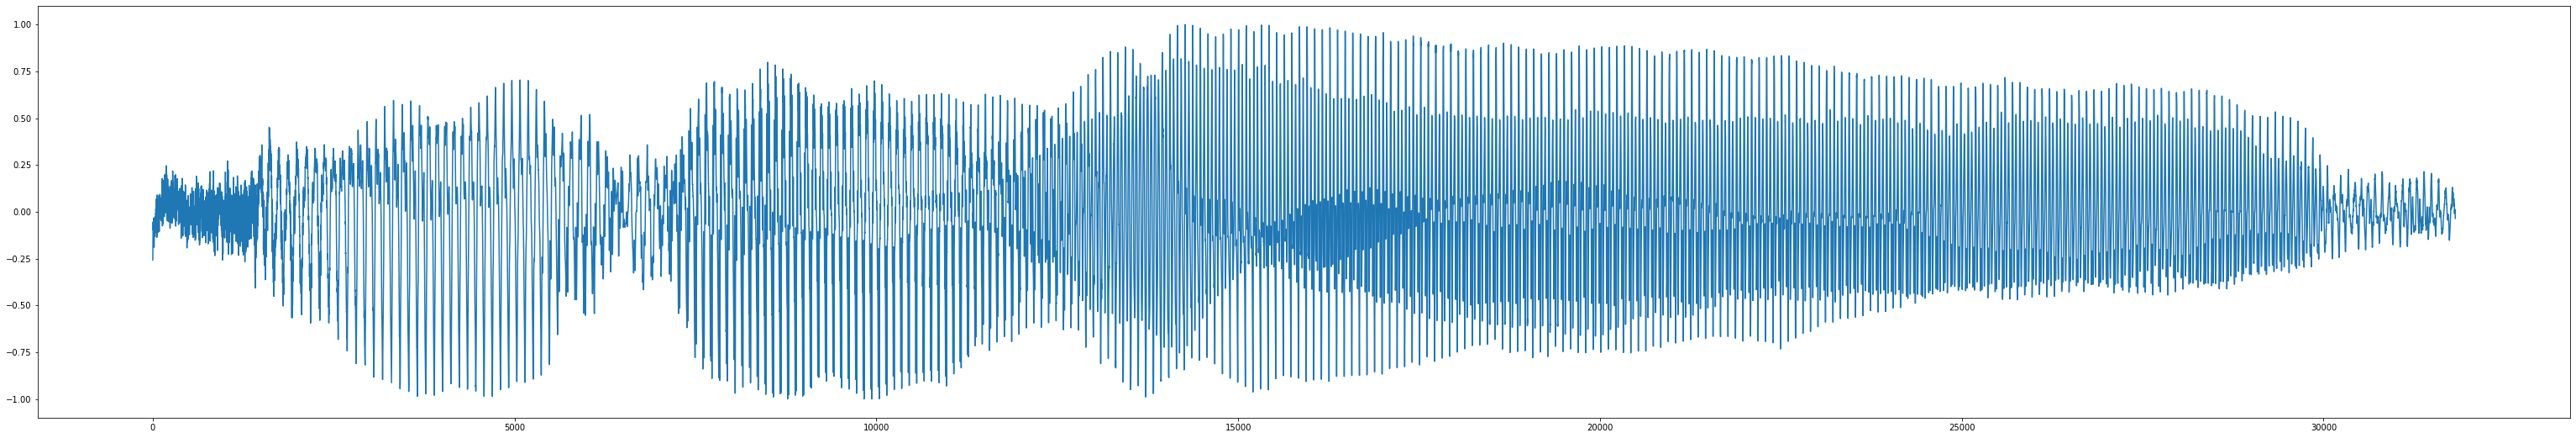

In [92]:
for i in range(len(start)):
    height = (end[i]-start[i])/3000
    width = (end[i]-start[i])/500
    if(height > 4) :
        fig = plt.figure(figsize=(width, height) )
        print(plt.plot(y[start[i]:end[i]+4800]))
        #plt.savefig("figure2/fire_2_" + str(i+1) +'.png')
        
        sf.write("audio2/fire_4_" + str(i) + ".wav", y[start[i]-4800:end[i]+9600], sr, subtype='PCM_24')

In [94]:
x=4
sf.write("fire_4_" + str(x) + ".wav", y[start[x]-4800:end[x]-4800], sr, subtype='PCM_32')

In [48]:
new_sr = 16000
directory = os.listdir('audio/')
for file in directory :
    y, origin_sr = librosa.load('audio/' + file, sr=sr)
    resample = librosa.resample(y, origin_sr, new_sr)
    sf.write("audio16000/" +file, resample, new_sr, subtype='PCM_16')

32655
33557
32756
30656
29917
30879
32318
29594
32005
38602
30363
28436
29233
34059
34001
29421
28781
28129
29313
32237
30924
30924
30924
31666
33320
30017
32490
31642


In [119]:
wav = 'newsroom.wav'

origin_sr = librosa.get_samplerate(wav)

y, sr = librosa.load(wav, sr=origin_sr)
print('sr: ', sr)
print('wav shape: ', y.shape)
print('length: ', y.shape[0]/float(sr), 'secs')

sr:  44100
wav shape:  (5466112,)
length:  123.9481179138322 secs


In [120]:
for i in range(450):
    #print(np.random.randint(len(y)-40000))
    x = np.random.randint(len(y)-40000)
    z = x + 40000
    sf.write("newsroombg_negative/" + str(i) +".wav", y[x:z], origin_sr, subtype='PCM_16')

x = 571325
z = x + 40000

sf.write("background/3.wav", y[x:z], origin_sr, subtype='PCM_16')

In [121]:
new_sr = 16000
directory = os.listdir('newsroombg_negative/')
for file in directory :
    y, origin_sr = librosa.load('newsroombg_negative/' + file, sr=sr)
    resample = librosa.resample(y, origin_sr, new_sr)
    sf.write("newsroombg_negative16000/" +file, resample, new_sr, subtype='PCM_16')

In [117]:
fire_directory = os.listdir('audio16000/')
background_directory = os.listdir('newsroombg16000/')



for b_file in background_directory :
    print(b_file)
    background, background_sr = librosa.load('newsroombg16000/' + b_file, sr=16000)
    for f_file in fire_directory:
        
        new_audio = []
        
        fire, fire_sr = librosa.load('audio16000/' + f_file, sr=16000)
        fit_background = background[0:len(fire)]
        
        for i in range(len(fire)):
            new_audio.append((0.2*fire[i])+(0.8*background[i]))
        
        #print(max(new_audio))
        
        #fig = plt.figure(figsize=(50, 8)) 
        
        #print(plt.plot(new_audio))
        
        sf.write("final_audio/" +b_file + "_" + f_file, new_audio, 16000, subtype='PCM_16')

1.wav
10.wav
12.wav
13.wav
14.wav
15.wav
16.wav
20.wav
21.wav
23.wav
25.wav
27.wav
30.wav
31.wav
34.wav
4.wav
6.wav
7.wav
8.wav
9.wav


In [ ]:
fire_directory = os.listdir('test/fire/')
background_directory = os.listdir('test/newsroombg/')



for b_file in background_directory :
    print(b_file)
    background, background_sr = librosa.load('test/newsroombg/' + b_file, sr=16000)
    for f_file in fire_directory:
        
        new_audio = []
        
        fire, fire_sr = librosa.load('test/fire/' + f_file, sr=16000)
        fit_background = background[0:len(fire)]
        
        for i in range(len(fire)):
            new_audio.append((0.2*fire[i])+(0.8*background[i]))
        
        #print(max(new_audio))
        
        #fig = plt.figure(figsize=(50, 8)) 
        
        #print(plt.plot(new_audio))
        
        sf.write("test/final_audio/" +b_file + "_" + f_file, new_audio, 16000, subtype='PCM_16')